# Assignment 2


## Part 1: Questions to text and lectures.

**A) Questions regarding the Segal and Heer paper**

- *What is the Oxford English Dictionary's defintion of a narrative?*

> According the Oxford English Dictionary the definition of a narrative is: “an account of a series of events, facts, etc., given in order and with the establishing of connections between them.”



- *What is your favorite visualization among the examples in section 3? Explain why in a few words.*

>Our favourite visualization of the different examples is the "*Budget Forecasts, Compared With Reality*". It was best visualised as it takes the user through the story, by scrolling through the slide show with a simple and clear layout (consistent visual platform), but still keeps it optional for the reader in the end to make their own choices and look into what they found interesting. This visualization are based on the martini glass structure; following a tight narrative path early on (the stem of the glass) and then opening up later for free exploration (the body of the glass) and also it uses details-on-demand, which we found to be a good way of visualizing a story.



- *What's the point of Figure 7?*

>The point of Figure 7 is to give an overveiw of how the different narrative vizualisations have included and excluded different design features in their storytelling. This shows that there is a pattern depending on the genre, especially shown in the final categories, which depict unique patterns for narrative visualization compared to other forms of visual storytelling.

- *Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).*

>The most common design choice within the Visual Narrative categories are the following:
>1. ***Visual structuring*** has ***Consistent Visual Platform*** as the most common.
>2. ***Highlighting*** has ***Feature Distinction*** as the most common.
>3. ***Transition Guidance*** has ***Object Continuity*** as the most common.

>The most common design choice within the Narrative Structure categories are the following:
>1. ***Ordering*** has ***User Directed Path*** as the most common.
>2. ***Interactivity*** has ***Filtering / Selection / Search*** as the mos common.
>3. ***Messaging*** has ***Captions / Headlines*** as the most common.

- *Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?*

>We think that the more visual explanations (instead of pure text) the better, because we learn better through illustrations. We also like to visualize in our own pace, as we think it is important to understand one element before moving on to the next. Therefore, we really like the slide show and comic strip as this can provide much information in varying ways, which can be done in the pace of your choice. 
>We like magazine style the least as this doesn't include that much visual elements, but more text. Also the diversity of how the information is provided is low.

**B) Questions about the talk on explanatory data visualization**

- *What are the three key elements to keep in mind when you design an explanatory visualization?*
>1. Start with a question about the result you want to communicate
>2. Allow users to explore and investigate the visualization
>3. Be aware about the type of readers and design the visualization accordingly 


- *In the video I talk about (1) overview first, (2) zoom and filter, (3) details on demand.*
    - *Go online and find a visualization that follows these principles (don't use one from the video).*
    - *Explain how it does achieves (1)-(3). It might be useful to use screenshots to illustrate your explanation.*



>[Here](https://informationisbeautiful.net/visualizations/mountains-out-of-molehills/) you can find the link to the chosen visualization. It visualizes a timeline of media-inflamed fears. 


>In the image below, it can be noticed that the visualization has an overview (1) of the number of news media mentions of fears like asteroids, bird flu, ebola, killer wasps, etc. versus a timeline in years. 

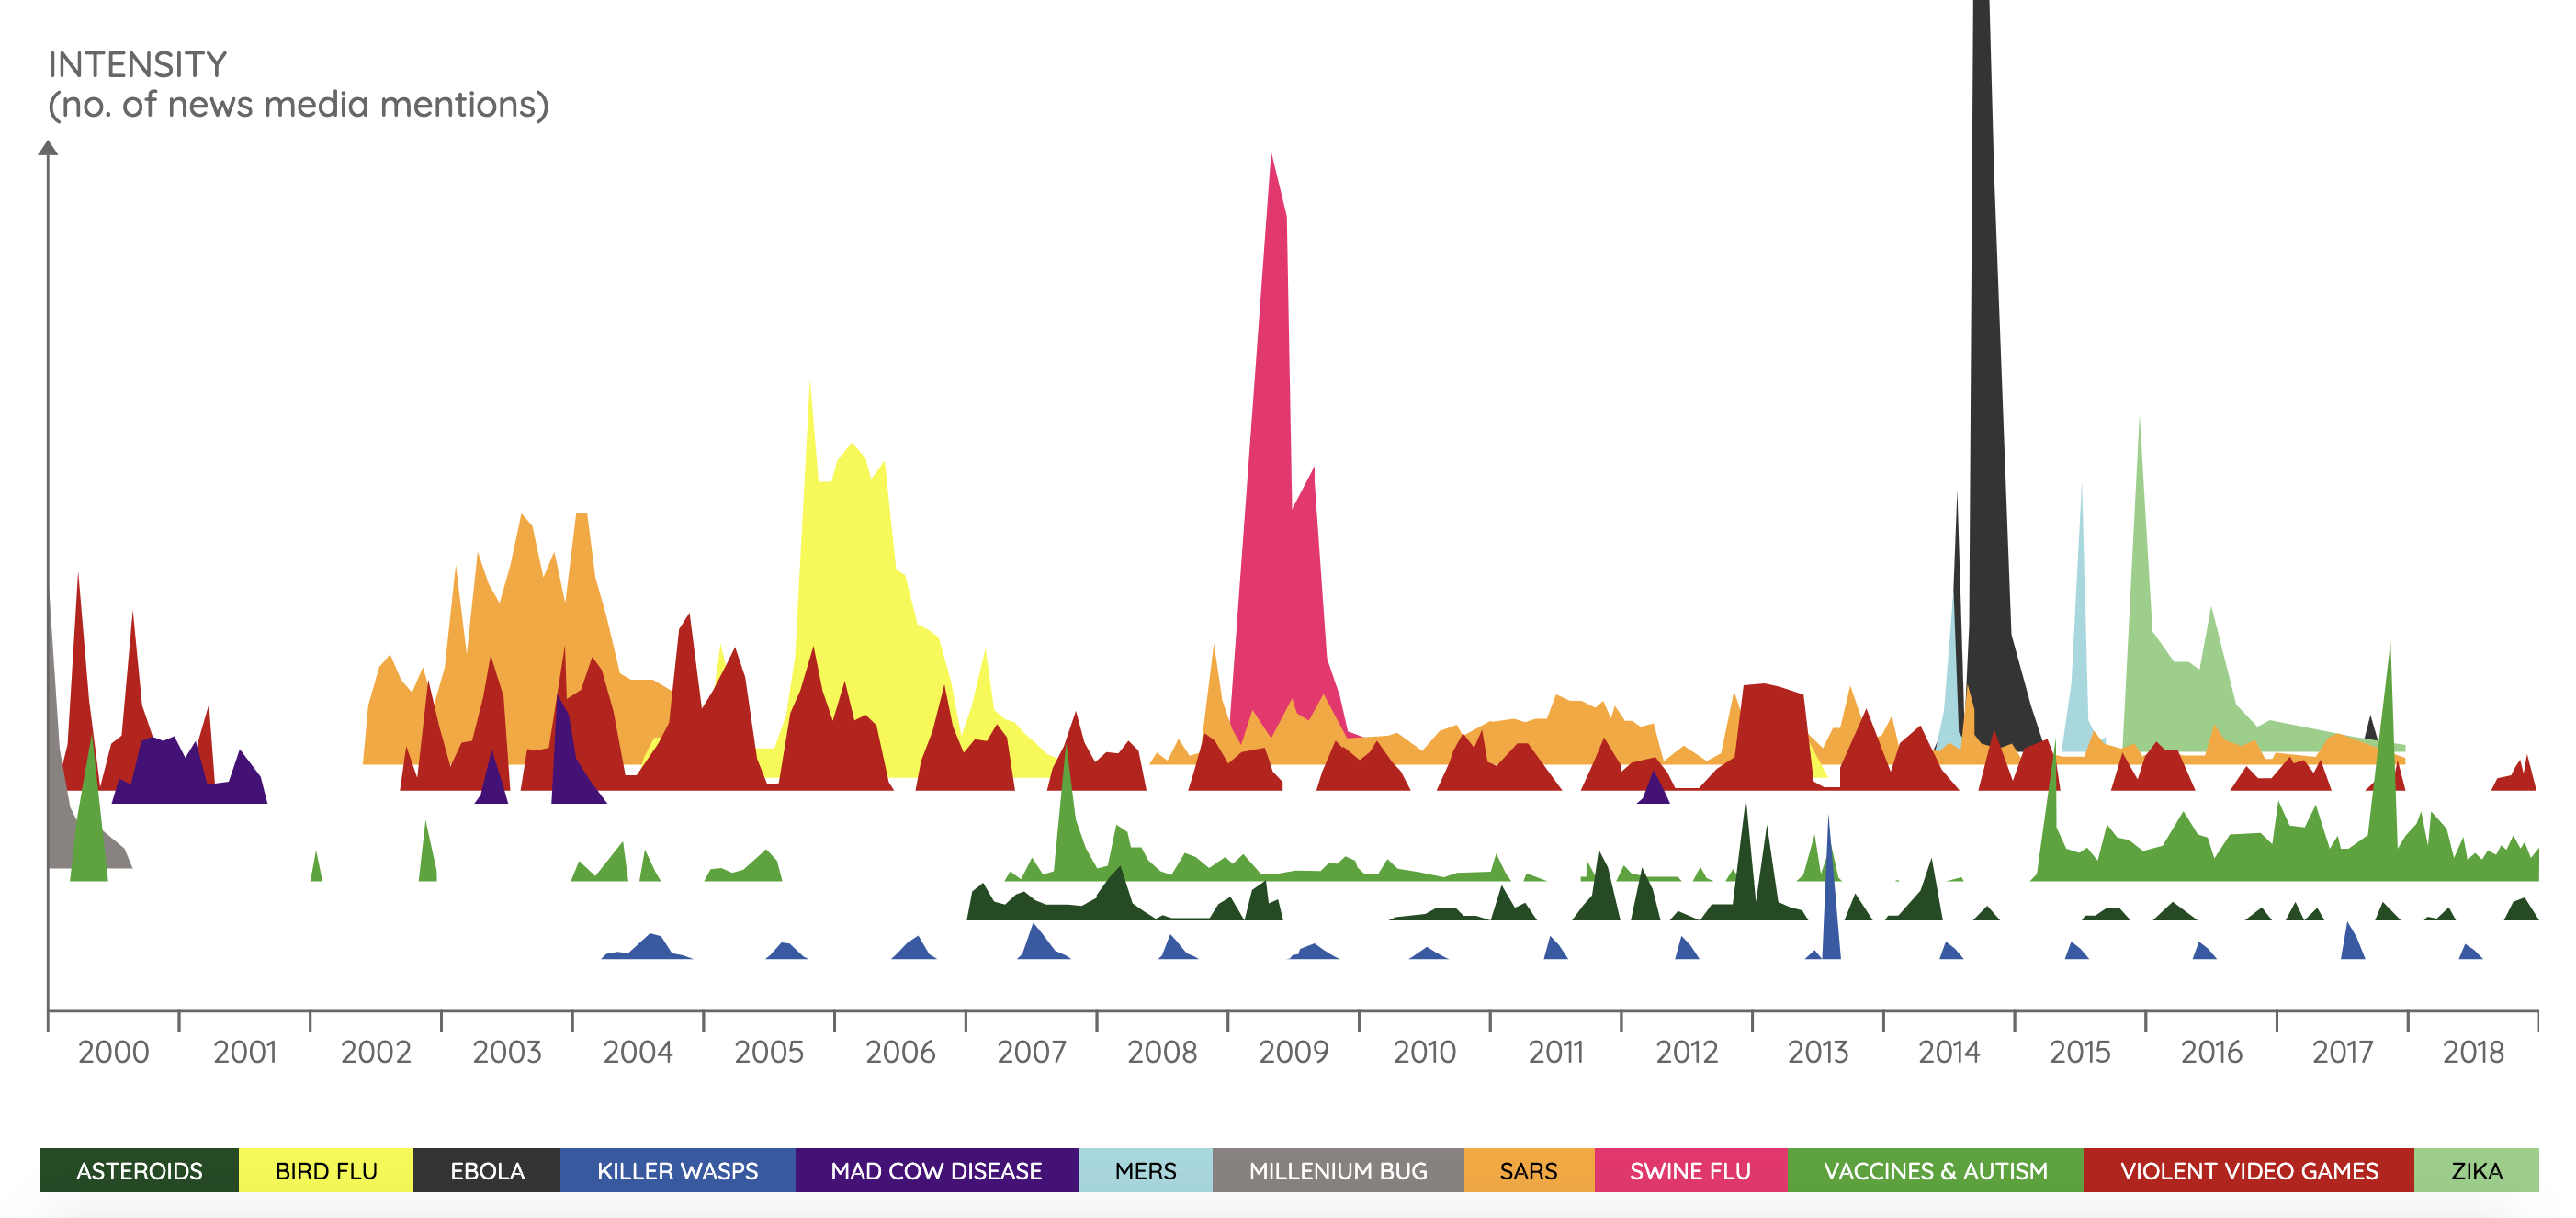

>It is also possible to filter (2) the data by fears in order to better visualize the fear one are interested in. This is illustrated in the image below, where the fear 'killer wasps' is selected. The color intensity of the remaining fears is diminished, so that the selected fear can stand out, but it still possible to compare the graph of the selected fear with the others. 

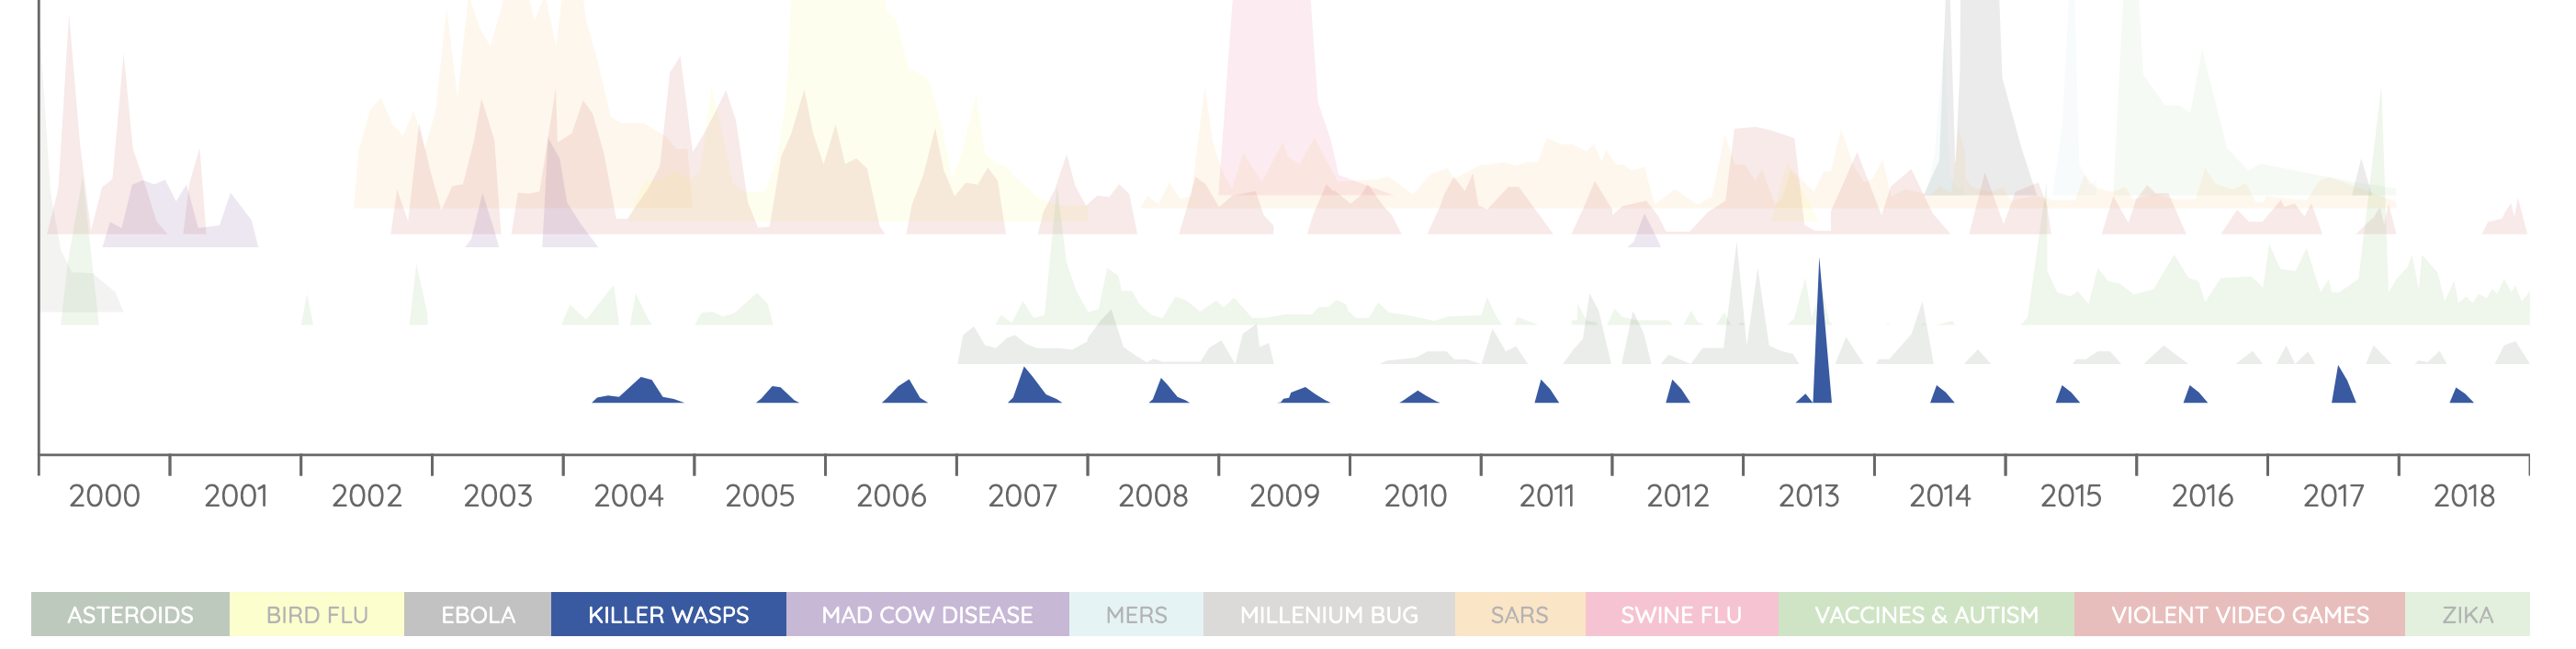

>Finally, one can have more details (3) about a given fear if it is selected. In this case, an informative box appears in the upper right corner as illustrated below for Ebola. 

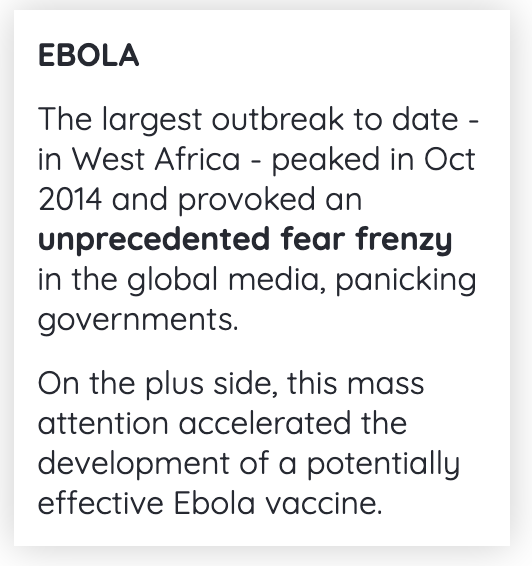

- *Explain in your own words: How is explanatory data analysis different from exploratory data analysis?*

>When analysing data, one should learn about it through exploratory visualisations  by forumalting hypothesis, checking them and deriving conclusions. Once this process is finished, one should communicate the results throough explanatory visualisations. 

## Part 2: Random forest and weather


**Part 2A: Random forest binary classification.**

- Using the and instructions and material from Week 7, build a random forest classifier to distinguish between two types (you choose) of crime using on spatio-temporal (where/when) features of data describing the two crimes. When you're done, you should be able to give the classifier a place and a time, and it should tell you which of the two types of crime happened there.
  - Explain about your choices for training/test data, features, and encoding. (You decide how to present your results, but here are some example topics to consider: Did you balance the training data? What are the pros/cons of balancing? Do you think your model is overfitting? Did you choose to do cross-validation? Which specific features did you end up using? Why? Which features (if any) did you one-hot encode? Why ... or why not?))
  - Report accuracy. Discuss the model performance.

In [59]:
# Importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Importing data
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [61]:
data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0


Two crime categories that have different spatio-temporal patterns are VEHICLE THEFT and FRAUD.

In [62]:
# Vehicle theft, fraud dataframes with Time,DayOfWeek, Date, PdDistrict, Category columns 
vehicle_theft_df = data[data['Category']=='VEHICLE THEFT'][['Time','DayOfWeek', 'Date', 'PdDistrict', 'Category']]
fraud_df = data[data['Category']=='FRAUD'][['Time','DayOfWeek', 'Date', 'PdDistrict', 'Category']]
print('There are', vehicle_theft_df.shape[0], "vehicle theft examples and", fraud_df.shape[0], "fraud examples")

There are 126228 vehicle theft examples and 41348 fraud examples


The goal is to balance the dataset because the model built is a predictive one based on Decision Trees, so doing that can drive performance gains. In order to achieve this, we down sample the majority class to the size of the minority class.

In [63]:
# Randomly sample from vehicle thefts data the amount of fraud examples (the category with the lowest amount)
vehicle_theft_df = vehicle_theft_df.sample(n=fraud_df.shape[0], replace=False)

# Concatenate both dataframes
vehicle_theft_fraud_df = pd.concat([vehicle_theft_df, fraud_df])

# Take a row (which is x) and take cell of Date and Time -> and concatenate them to one big string
# that can be then converted to datetime. Remove any seconds and minutes (round to hours)
# then specify that dates are in GMT-7
vehicle_theft_fraud_df["Date"] = vehicle_theft_fraud_df.apply(lambda x: pd.to_datetime(x.Date + " " + x.Time).round("H").tz_localize("Etc/GMT-7"), axis = 1) 

# The HourOfDay column should contain a number between 0 and 23
vehicle_theft_fraud_df['HourOfDay'] = vehicle_theft_fraud_df['Date'].apply(lambda date: date.hour)

# Create a column with MonthOfYear
vehicle_theft_fraud_df['MonthOfYear'] = vehicle_theft_fraud_df['Date'].apply(lambda date: date.month)

This is what the dataframe looks like:

In [64]:
vehicle_theft_fraud_df.head()

,Time,DayOfWeek,Date,PdDistrict,Category,HourOfDay,MonthOfYear
867098,06:00,Monday,2003-08-11 06:00:00+07:00,PARK,VEHICLE THEFT,6,8
1650968,15:00,Sunday,2015-06-07 15:00:00+07:00,PARK,VEHICLE THEFT,15,6
938440,13:00,Tuesday,2004-01-20 13:00:00+07:00,NORTHERN,VEHICLE THEFT,13,1
286337,14:00,Friday,2005-08-12 14:00:00+07:00,BAYVIEW,VEHICLE THEFT,14,8
279285,17:30,Friday,2007-08-24 18:00:00+07:00,NORTHERN,VEHICLE THEFT,18,8


Next, we separate the data into features and labels (or the values we want to predict). As features, we select the temporal and spatial variables (DayOfWeek, PdDistrict, HourOfDay and MonthOfYear) because it is supposed that they influence the occurence of the chosen crimes. As labels, the Category column is selected because it is the variable that the model should predict. 

We also convert the Pandas dataframes to Numpy arrays in order to feed them to the classifier as parameters.

In [65]:
# Labels are the values we want to predict
labels = np.array(vehicle_theft_fraud_df['Category'])

# Remove the labels from the features and the Date, Time columns
features = vehicle_theft_fraud_df.drop(['Category', 'Date', 'Time'], axis = 1)


This is how the features look like:

In [66]:
features.head()

,DayOfWeek,PdDistrict,HourOfDay,MonthOfYear
867098,Monday,PARK,6,8
1650968,Sunday,PARK,15,6
938440,Tuesday,NORTHERN,13,1
286337,Friday,BAYVIEW,14,8
279285,Friday,NORTHERN,18,8


DayOfWeek and PdDistrict are categorical variables, but the machine learning algorithm needs numerical ones. Therefore, these features are encoded with one-hot encoding (see below). This process takes categorical variables and converts them to a numerical representation (the single column of DayOfWeek will be replaced by seven columns with binary data).

We could simply map days of the week to numbers 1–7, but this might lead to the algorithm placing more importance on Sunday because it has a higher numerical value.

In [67]:
# One hot encoding
features = pd.get_dummies(features)

# Convert to numpy array
features = np.array(features)

Next, we randomly split the data into training and testing sets. We do it randomly in order to get a representation of all data points.

In [68]:
# Setting the random state to 42 for reproducible results
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [69]:
# Function to evaluate the precision of the classifier
def model_precision(test_labels,predictions):
  print(classification_report(test_labels, predictions))

In [70]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [71]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [72]:
model_precision(test_labels, predictions)

               precision    recall  f1-score   support

        FRAUD       0.64      0.65      0.65     10286
VEHICLE THEFT       0.65      0.63      0.64     10388

     accuracy                           0.64     20674
    macro avg       0.64      0.64      0.64     20674
 weighted avg       0.64      0.64      0.64     20674



Since the dataset is balanced, the baseline performance (random guess) is 50%.It can be noted that there is approximately a 15% improvement over the baseline (50%). We conclude that temporal and spatial data do indeed help in predicting the type of a crime.

**Part 2B: Info from weather features.**

- Now add features from weather data to your random forest.
    - Report accuracy.
    - Discuss how the model performance changes relative to the version with no weather data.
    - Discuss what you have learned about crime from including weather data in your model. 

In [73]:
# parse_dates specifies what columns contain dates (instead of a string column -> it becomes a date_time column)
# data_parser -> we specify our custom date_parser (Pandas has default data_parser, usually we do not need to specify it)
# in our data_parser we use "lambda" function - it means that we want to apply something to each value in the column
# pd.to_datetime(x) - converts each value to date_time object. By default pd.to_datetime assigns GMT0 timezone, 
# which is wrong, thus, we specification of timezone with tz_convert(None)
# now we want to specify the correct timezone -> we use tz_localize("..")
# after we can convert dates to the actual SanFrancisco timezone with tz_convert("..")
weather = pd.read_csv('C:\\Users\\Bruger\\Desktop\\Social data analysis and visualization\\7. Machine Learning II\\weather_data.csv', parse_dates=["date"],
                date_parser=lambda x: pd.to_datetime(x).tz_convert(None).tz_localize("Etc/GMT+3").tz_convert("Etc/GMT-7")) 
weather.head()

,date,temperature,humidity,weather,wind_speed,wind_direction,pressure
0,2012-10-01 23:00:00+07:00,16.330000,88.0,light rain,2.0,150.0,1009.0
1,2012-10-02 00:00:00+07:00,16.324993,87.0,sky is clear,2.0,147.0,1009.0
2,2012-10-02 01:00:00+07:00,16.310618,86.0,sky is clear,2.0,141.0,1009.0
3,2012-10-02 02:00:00+07:00,16.296243,85.0,sky is clear,2.0,135.0,1009.0
4,2012-10-02 03:00:00+07:00,16.281869,84.0,sky is clear,2.0,129.0,1009.0


Next, we merge the 2 datasets.

In [74]:
merged = pd.merge(left=weather, right=vehicle_theft_fraud_df, left_on='date', right_on='Date').drop_duplicates()

This is what the merged version looks like:

In [75]:
merged.head()

,date,temperature,humidity,weather,wind_speed,wind_direction,pressure,Time,DayOfWeek,Date,PdDistrict,Category,HourOfDay,MonthOfYear
0,2012-10-02 08:00:00+07:00,16.209995,79.0,sky is clear,1.0,98.0,1011.0,08:03,Tuesday,2012-10-02 08:00:00+07:00,SOUTHERN,FRAUD,8,10
1,2012-10-02 09:00:00+07:00,16.195621,78.0,sky is clear,1.0,92.0,1011.0,08:40,Tuesday,2012-10-02 09:00:00+07:00,SOUTHERN,FRAUD,9,10
2,2012-10-02 12:00:00+07:00,16.152496,75.0,sky is clear,1.0,73.0,1012.0,11:37,Tuesday,2012-10-02 12:00:00+07:00,SOUTHERN,FRAUD,12,10
3,2012-10-02 12:00:00+07:00,16.152496,75.0,sky is clear,1.0,73.0,1012.0,12:00,Tuesday,2012-10-02 12:00:00+07:00,PARK,FRAUD,12,10
4,2012-10-02 12:00:00+07:00,16.152496,75.0,sky is clear,1.0,73.0,1012.0,12:00,Tuesday,2012-10-02 12:00:00+07:00,RICHMOND,FRAUD,12,10


Again, we choose the same spatio-temporal features, but this time we add the weather features (temperature, humidity, weather, wind_speed, wind_direction, pressure). 

In [76]:
# Labels are the values we want to predict
labels = np.array(merged['Category'])

# Remove the labels from the features and the Date, date, Time columns
features = merged.drop(['Category', 'Date', 'Time', 'date'], axis = 1)

# One hot encoding
features = pd.get_dummies(features)

# Convert to numpy array
features = np.array(features)

In [77]:
# Randomly split the data into training and testing sets to get a representation of all data points 
# Setting the random state to 42 for reproducible results
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
model_precision(test_labels, predictions)

               precision    recall  f1-score   support

        FRAUD       0.67      0.76      0.71      3402
VEHICLE THEFT       0.64      0.53      0.58      2712

     accuracy                           0.66      6114
    macro avg       0.66      0.65      0.65      6114
 weighted avg       0.66      0.66      0.66      6114



Compared to the predictions without the weather data, the improvement is nearly insignificant. We conclude that either our hypothesis that vehicle thefts depends on weather data is wrong or we should improve our model in order to gain more accuracy.


## Part 3: Data visualization
- *Create the Bokeh visualization from Part 2 of the Week 8 Lecture.*
- *Provide nice comments for your code. Don't just use the # inline comments, but the full Notebook markdown capabilities and explain what you're doing.*

 The aim of this part is to make an interactive visualisation of all the focus crimes for the hourly number of crimes pr day. 
 

 **Preparing data**

First we need to prepare the data by normalizing the data and organizing it in the wished way.
The data is filtered so we only have the focus crimes and so we only select the data from year 2010-2018. The data is then grouped by hour-of-the-day.

In [78]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# List of focus crimes
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']

# Alphabetical order
focuscrimes = sorted(focuscrimes)

# Select only the crimes that are in focuscrimes
data_focus_crimes = data[data.Category.isin(focuscrimes)]

# Convert the Date column to datetime and remove any seconds and minutes (round to hours)
data_focus_crimes['Date']= [d+ ' ' +t for (d,t) in zip(data_focus_crimes.Date, data_focus_crimes.Time)]
data_focus_crimes['Date']= pd.to_datetime(data_focus_crimes['Date'])

# The HourOfDay column should contain a number between 0 and 23
data_focus_crimes['HourOfDay'] = data_focus_crimes['Date'].apply(lambda date: date.hour)

# Take the data for the period of 2010-2018
date_range = range(2010,2019)
focus_crimes_2010_2018 = data_focus_crimes[data_focus_crimes.Date.dt.year.isin(date_range)]

# Group the data by the category and hour of the day
group_by_category_hour = focus_crimes_2010_2018.groupby(["Category", 'HourOfDay'])["PdId"].count()


Now the data is normalized by divide the number of crimes pr hour by the total number of the crimes for every crime type. This means that for the crime 'ASSULT' the number of assault-counts in 1st hour is divided by the total number of assaults and so on for all the other hours. 

In [79]:
# Initialize data frame
norm_df = pd.DataFrame({'Hour': range(24)})

# Normalize data
for crime_index in range(len(focuscrimes)):
    crime = focuscrimes[crime_index]
    total = len(focus_crimes_2010_2018[focus_crimes_2010_2018["Category"] == crime])
    hour_count = group_by_category_hour[crime].values
    norm_data = hour_count/total
    norm_df.insert(crime_index+1, crime, norm_data)

The new data frame (norm_df) contains the normalised data, where the first column is the hour (1-24) and the other columns correspond to the crime types, where the rows corresponds to the hour.

Here is what the normalized data frame looks like:

In [80]:
norm_df.head()

,Hour,ASSAULT,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
0,0,0.056427,0.040437,0.051670,0.120321,0.034677,0.080726,0.039461,0.129965,0.055337,0.044469,0.028392,0.054485,0.035958,0.054658
1,1,0.048098,0.027947,0.038017,0.112002,0.020679,0.076938,0.025276,0.096167,0.060035,0.033556,0.020475,0.038185,0.024205,0.039489
2,2,0.043706,0.031685,0.032346,0.098930,0.016767,0.070361,0.015452,0.060976,0.060345,0.029464,0.025571,0.035545,0.018258,0.033965
3,3,0.023417,0.033482,0.018273,0.047534,0.012391,0.026909,0.009955,0.036585,0.037375,0.023462,0.021294,0.025907,0.011993,0.023743
4,4,0.014566,0.029889,0.015123,0.017231,0.009198,0.014152,0.006559,0.019512,0.023489,0.020052,0.016198,0.017711,0.010077,0.016241


**Make visualization using Bokeh**

Now the normalized data is used to make an interactive visualization. To do that we will be using Bokeh by importing the following packages: 

In [81]:
# Import Bokeh packages
import bokeh.palettes as c
from bokeh.io import output_notebook,show
from bokeh.io import output_file, show
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend

In [82]:
# To get the output inside the notebook
output_notebook()

Loading BokehJS ...

The data is first converted from Pandas Dataframe into Bokeh ColumnDataSource. Then we make an empty figure p, which has the hours (0-24) as the range on the x-axis. Then the bars of the bar chart is calculated and stored in the vector *bar*. These bars corresponds to the normalized number of crimes pr hour for every focus crime type (in total 14 different crime types). Then we add an interactive legend to the figure and mute all the bar charts.

In [83]:
# Convert the Pandas Dataframe to Bokeh ColumnDataSource
source = ColumnDataSource(norm_df)

# Create an empty figure with the x_range being hours
hour_range =[str(x) for x in range(1,25)]
color=c.viridis(len(focuscrimes))
p = figure(x_range = FactorRange(factors=hour_range), plot_height=400,plot_width=1200, title="Crimes per hour",x_axis_label='Hour of the day',y_axis_label='Relative Frequency',
           toolbar_location=None, tools="")

# Initialize bar and items
bar = {} #for the bars
items = [] #for the custom legend

# Store all p.vbars calculations inside bar and also in items to create the legend
for indx,i in enumerate(focuscrimes):
  bar[i] = p.vbar(x='Hour',  top=i, source=source, 
                 muted_alpha=0.1, muted = True, muted_color = None, width=1, fill_alpha=0.2, color=color[indx]) 
  items.append((i, [bar[i]]))

# Create legend and add it to the figure
legend = Legend(items=items, location='center_left')
p.add_layout(legend, 'left') 

# Make the legend interactive
p.legend.click_policy="mute" 

# Display the figure
show(p)

The figure above shows an interactive visualization of hourly number of crimes pr day for all the 14 focus crimes. From the output all crimes are muted, but by clicking on the different crimes in the legend, it is possible for the user to decide, what crimes they want to view. Also it is possible to veiw multiple crimes at the same time to be able to compare them to each other. The x-axis of the figure shows the hours of the day and the y-axis shows the relative frequency of the crimes. (Use the scroll bar to veiw the entire figrue)